In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Loading of dataset

In [6]:
df_test = pd.read_csv('.\data\Testing.csv')
df = pd.read_csv('.\data\Testing.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [8]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [9]:
df.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  muscle_wasting   vomiting  burning_micturition  \
count         42.000000       42.000000  42.000000            42.000000   
mean           0.023810        0.023810   0.404762             0.047619   
std            0.154303        0.154303   0.496796             0.215540   
min            0.000000        0.000000   0.000000             0.000000   
25%            0.000000        0.000000   0.000000             0.000000   
50%            0.000000        0.000000   0.000000             0.000000   
75%            0.000000        0.000000   1.000000             0.000000   
max            1.000000        1.000000   1.000000             1.000000   

       spotting_ urination    fatigue  weight_gain    anxiety  \
count            42.000000  42.000000    42.000000  42.000000   
mean              0.023810   0.404762     0.023810   0.023810   
std               0.154303   0.496796     0.154303   0.154303   
min               0.000000   0.000000     0.000000   0.000000   
25%               0.000000   0.000000     0.000000   0.000000   
50%               0.000000   0.000000     0.000000   0.000000   
75%               0.000000   1.000000     0.000000   0.000000   
max               1.000000   1.000000     1.000000   1.000000   

       cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
count             42.000000    42.000000    42.000000     42.000000   
mean               0.023810     0.047619     0.095238      0.047619   
std                0.154303     0.215540     0.297102      0.215540   
min                0.000000     0.000000     0.000000      0.000000   
25%                0.000000     0.000000     0.000000      0.000000   
50%                0.000000     0.000000     0.000000      0.000000   
75%                0.000000     0.000000     0.000000      0.000000   
max                1.000000     1.000000     1.000000      1.000000   

        lethargy  patches_in_throat  irregular_sugar_level      cough  \
count  42.000000          42.000000              42.000000  42.000000   
mean    0.095238           0.023810               0.023810   0.119048   
std     0.297102           0.154303               0.154303   0.327770   
min     0.000000           0.000000               0.000000   0.000000   
25%     0.000000           0.000000               0.000000   0.000000   
50%     0.000000           0.000000               0.000000   0.000000   
75%     0.000000           0.000000               0.000000   0.000000   
max     1.000000           1.000000               1.000000   1.000000   

       high_fever  sunken_eyes  breathlessness   sweating  dehydration  \
count   42.000000    42.000000       42.000000  42.000000    42.000000   
mean     0.285714    

In [10]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

## Data Preprocessing and Feature Engineering

In [11]:
columns_with_zeros = df.columns[(df == 0).all()]
columns_with_zeros

Index(['fluid_overload'], dtype='object')

In [12]:
df.drop(columns=['fluid_overload.1','fluid_overload'],inplace=True)

In [13]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [14]:
label_mapping = {
    'Acne': 'Skin Disorders',
    'Psoriasis': 'Skin Disorders',
    'Impetigo': 'Skin Disorders'
}

df['prognosis'] = df['prognosis'].replace(label_mapping)

In [15]:
skin_disorders_symptoms = df[df['prognosis'] == 'Skin Disorders'].iloc[:, :-2]

skin_disorders_symptoms = skin_disorders_symptoms.columns[skin_disorders_symptoms.eq(1).any()]

skin_disorders_symptoms_list = skin_disorders_symptoms.tolist()

In [16]:
skin_disorders_symptoms_list

['skin_rash',
 'joint_pain',
 'high_fever',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose']

In [17]:
symptom_column = 'yellow_crust_ooze'

diseases_with_symptom = df[df[symptom_column] == 1]['prognosis']

In [18]:
diseases_with_symptom.unique()

array(['Skin Disorders'], dtype=object)

In [19]:
columns_to_drop = ['pus_filled_pimples', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'skin_peeling','yellow_crust_ooze']
df.drop(columns=columns_to_drop, inplace=True)

In [20]:
df = df[df['prognosis'] != 'Skin Disorders']

In [21]:
df.shape

(39, 121)

In [22]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_o

In [23]:
diseases_with_chills = df[df['chills'] == 1]['prognosis']
diseases_with_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [24]:
diseases_with_shivering = df[df['shivering'] == 1]['prognosis']
diseases_with_shivering.unique()

array(['Allergy'], dtype=object)

In [25]:
df['shivering_or_chills'] = df['shivering'] | df['chills']
df.drop(columns=['shivering','chills'], inplace=True)

In [26]:
diseases_with_shivering_or_chills = df[df['shivering_or_chills'] == 1]['prognosis']
diseases_with_shivering_or_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [27]:
diseases_with_nodal_skin_eruptions = df[df['nodal_skin_eruptions'] == 1]['prognosis']
diseases_with_nodal_skin_eruptions.unique()

array(['Fungal infection'], dtype=object)

In [28]:
diseases_with_nodal_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_nodal_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [29]:
df['skin_rash'] = df['nodal_skin_eruptions'] | df['skin_rash']
df.drop(columns=['nodal_skin_eruptions'], inplace=True)

In [30]:
diseases_with_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [31]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          0                    1           0             0        0   
2        0          0                    0           0             1        1   
3        1          0                    0           0             0        0   
4        1          1                    0           0             1        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 1               0         1                    0   
3                 0               0         1                    0   
4                 0               0         0                    1   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    1        0            0        0                     0   

   mood_swings  weight_loss  restlessness  lethargy  patches_in_throat  \
0            0            0             0         0                  0   
1            0            0             0         0                  0   
2            0            0             0         0                  0   
3            0            0             0         0                  0   
4            0            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3  

In [32]:
diseases_with_skin_rash = df[df['malaise'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Chicken pox', 'Dengue', 'Hepatitis B', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [33]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections']

In [34]:
diseases_with_receiving_unsterile_injections = df[df['receiving_unsterile_injections'] == 1]['prognosis']
diseases_with_receiving_unsterile_injections.unique()

array(['Hepatitis B'], dtype=object)

In [35]:
diseases_with_receiving_blood_transfusion = df[df['receiving_blood_transfusion'] == 1]['prognosis']
diseases_with_receiving_blood_transfusion.unique()

array(['Hepatitis B'], dtype=object)

In [36]:
df['unprotected_blood_transfusion'] = df['receiving_blood_transfusion'] | df['receiving_unsterile_injections']
df.drop(columns=['receiving_blood_transfusion','receiving_unsterile_injections'], inplace=True)

In [37]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise']

In [38]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          0                    1           0             0        0   
2        0          0                    0           0             1        1   
3        1          0                    0           0             0        0   
4        1          1                    0           0             1        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 1               0         1                    0   
3                 0               0         1                    0   
4                 0               0         0                    1   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    1        0            0        0                     0   

   mood_swings  weight_loss  restlessness  lethargy  patches_in_throat  \
0            0            0             0         0                  0   
1            0            0             0         0                  0   
2            0            0             0         0                  0   
3            0            0             0         0                  0   
4            0            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3  

In [39]:
diseases_with_muscle_wasting = df[df['muscle_wasting'] == 1]['prognosis']
diseases_with_muscle_wasting.unique()

array(['AIDS'], dtype=object)

In [40]:
AIDS_symptoms = df[df['prognosis'] == 'AIDS'].iloc[:, :-2]

AIDS_symptoms = AIDS_symptoms.columns[AIDS_symptoms.eq(1).any()]

AIDS_symptoms_list = AIDS_symptoms.tolist()
AIDS_symptoms_list

['muscle_wasting', 'patches_in_throat', 'high_fever', 'extra_marital_contacts']

In [41]:
diseases_with_patches_in_throat = df[df['patches_in_throat'] == 1]['prognosis']
diseases_with_patches_in_throat.unique()

array(['AIDS'], dtype=object)

In [42]:
df['patches_in_throat'] = df['patches_in_throat'] | df['muscle_wasting']
df.drop(columns=['patches_in_throat'], inplace=True)

In [43]:
df['fatigue'] = df['fatigue'] | df['lethargy']
df.drop(columns=['lethargy'], inplace=True)

In [44]:
diseases_with_vomiting = df[df['vomiting'] == 1]['prognosis']
diseases_with_vomiting.unique()

array(['GERD', 'Chronic cholestasis', 'Peptic ulcer diseae',
       'Gastroenteritis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis D',
       'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
       'Heart attack', 'Hypoglycemia',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [45]:
diseases_with_nausea = df[df['nausea'] == 1]['prognosis']
diseases_with_nausea.unique()

array(['Chronic cholestasis', 'Malaria', 'Dengue', 'Typhoid',
       'hepatitis A', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypoglycemia', '(vertigo) Paroymsal  Positional Vertigo'],
      dtype=object)

In [46]:
df['vomiting'] = df['vomiting'] | df['nausea']
df.drop(columns=['nausea'], inplace=True)

In [47]:
diseases_with_sinus_pressure = df[df['sinus_pressure'] == 1]['prognosis']
diseases_with_sinus_pressure.unique()

array(['Common Cold'], dtype=object)

In [48]:
diseases_with_runny_nose = df[df['runny_nose'] == 1]['prognosis']
diseases_with_runny_nose.unique()

array(['Common Cold'], dtype=object)

In [49]:
df['runny_nose'] = df['runny_nose'] | df['sinus_pressure']
df.drop(columns=['sinus_pressure'], inplace=True)

In [50]:
diseases_with_loss_of_balance = df[df['loss_of_balance'] == 1]['prognosis']
diseases_with_loss_of_balance.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [51]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [52]:
df['unsteadiness'] = df['unsteadiness'] | df['loss_of_balance']
df.drop(columns=['loss_of_balance'], inplace=True)

In [53]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [54]:
Alcoholic_hepatitis_symptoms = df[df['prognosis'] == 'Alcoholic hepatitis'].iloc[:, :-2]

Alcoholic_hepatitis_symptoms = Alcoholic_hepatitis_symptoms.columns[Alcoholic_hepatitis_symptoms.eq(1).any()]

Alcoholic_hepatitis_symptoms_list = Alcoholic_hepatitis_symptoms.tolist()
Alcoholic_hepatitis_symptoms_list

['vomiting',
 'yellowish_skin',
 'abdominal_pain',
 'swelling_of_stomach',
 'distention_of_abdomen',
 'history_of_alcohol_consumption']

In [55]:
df['distention_of_abdomen'] = df['distention_of_abdomen'] | df['history_of_alcohol_consumption']
df.drop(columns=['history_of_alcohol_consumption'], inplace=True)

In [56]:
diseases_with_extra_marital_contacts = df[df['extra_marital_contacts'] == 1]['prognosis']
diseases_with_extra_marital_contacts.unique()

array(['AIDS'], dtype=object)

In [57]:
df['unprotected_blood/sex_transfusion'] = df['unprotected_blood_transfusion'] | df['extra_marital_contacts']
df.drop(columns=['extra_marital_contacts','unprotected_blood_transfusion'], inplace=True)

In [58]:
diseases_with_pain_in_anal_region = df[df['pain_in_anal_region'] == 1]['prognosis']
diseases_with_pain_in_anal_region.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [59]:
diseases_with_irritation_in_anus = df[df['irritation_in_anus'] == 1]['prognosis']
diseases_with_irritation_in_anus.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [60]:
df['pain/irritation_in_anal_region'] = df['pain_in_anal_region'] | df['irritation_in_anus']
df.drop(columns=['irritation_in_anus','pain_in_anal_region'], inplace=True)

In [61]:
diseases_with_dischromic_patches = df[df['dischromic _patches'] == 1]['prognosis']
diseases_with_dischromic_patches.unique()

array(['Fungal infection'], dtype=object)

In [62]:
df.rename(columns={'dischromic _patches': 'dischromic_patches'}, inplace=True)

In [63]:
diseases_with_joint_pain = df[df['joint_pain'] == 1]['prognosis']
diseases_with_joint_pain.unique()

array(['Dengue', 'hepatitis A', 'Hepatitis D', 'Hepatitis E',
       'Osteoarthristis'], dtype=object)

In [64]:
diseases_with_swelling_joints = df[df['swelling_joints'] == 1]['prognosis']
diseases_with_swelling_joints.unique()

array(['Osteoarthristis', 'Arthritis'], dtype=object)

In [65]:
df['swollen_painful_joints'] = df['swelling_joints'] | df['joint_pain']
df.drop(columns=['joint_pain','swelling_joints'], inplace=True)

In [66]:
diseases_with_spinning_movements = df[df['spinning_movements'] == 1]['prognosis']
diseases_with_spinning_movements.unique()

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [67]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [68]:
df['unsteadiness'] = df['unsteadiness'] | df['spinning_movements']
df.drop(columns=['spinning_movements'], inplace=True)

In [69]:
diseases_with_dizziness = df[df['dizziness'] == 1]['prognosis']
diseases_with_dizziness.unique()

array(['Hypertension ', 'Cervical spondylosis', 'Hypothyroidism'],
      dtype=object)

In [70]:
df['unsteadiness'] = df['unsteadiness'] | df['dizziness']
df.drop(columns=['dizziness'], inplace=True)

In [71]:
diseases_with_swollen_legs = df[df['swollen_legs'] == 1]['prognosis']
diseases_with_swollen_legs.unique()

array(['Varicose veins'], dtype=object)

In [72]:
diseases_with_swollen_extremeties = df[df['swollen_extremeties'] == 1]['prognosis']
diseases_with_swollen_extremeties.unique()

array(['Hypothyroidism'], dtype=object)

In [73]:
df['swollen_extremeties'] = df['swollen_extremeties'] | df['swollen_legs']
df.drop(columns=['swollen_legs'], inplace=True)

In [74]:
df.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          0                    1             0        0   
2        0          0                    0             1        1   
3        1          0                    0             0        0   
4        1          1                    0             1        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 1               0         1                    0   
3                 0               0         1                    0   
4                 0               0         0                    1   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    1        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      1   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               1           0                 1   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               1          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  1                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

In [75]:
df.shape

(39, 106)

In [76]:
pd.set_option('display.max_rows', None)
df.isna().sum()

itching                              0
skin_rash                            0
continuous_sneezing                  0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
irregular_sugar_level                0
cough                                0
high_fever                           0
sunken_eyes                          0
breathlessness                       0
sweating                             0
dehydration                          0
indigestion                          0
headache                 

In [79]:
df.columns[df.isnull().all()]

Index([], dtype='object')

In [80]:
df.shape

(39, 106)

## EDA

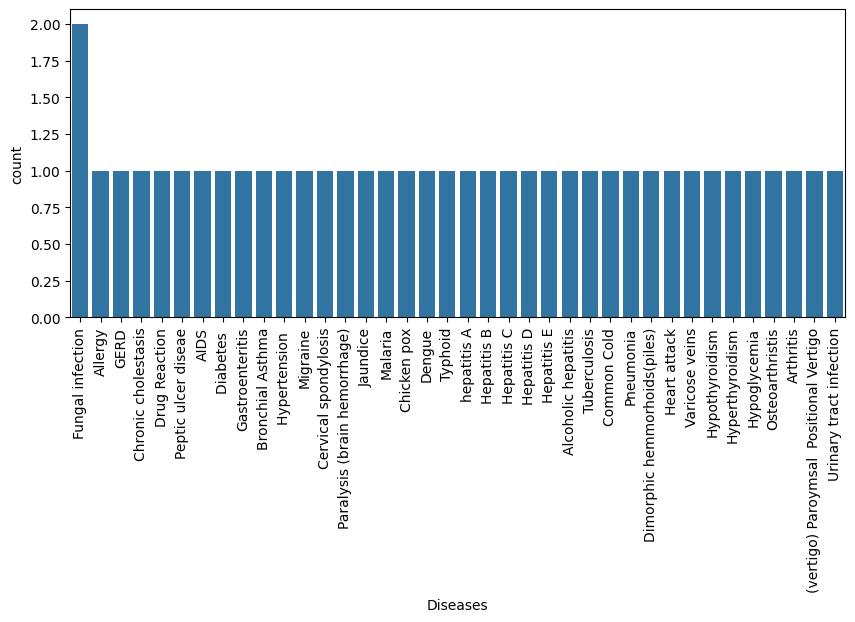

In [81]:
#countplot
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='prognosis')
plt.xticks(rotation=90)
plt.xlabel('Diseases');

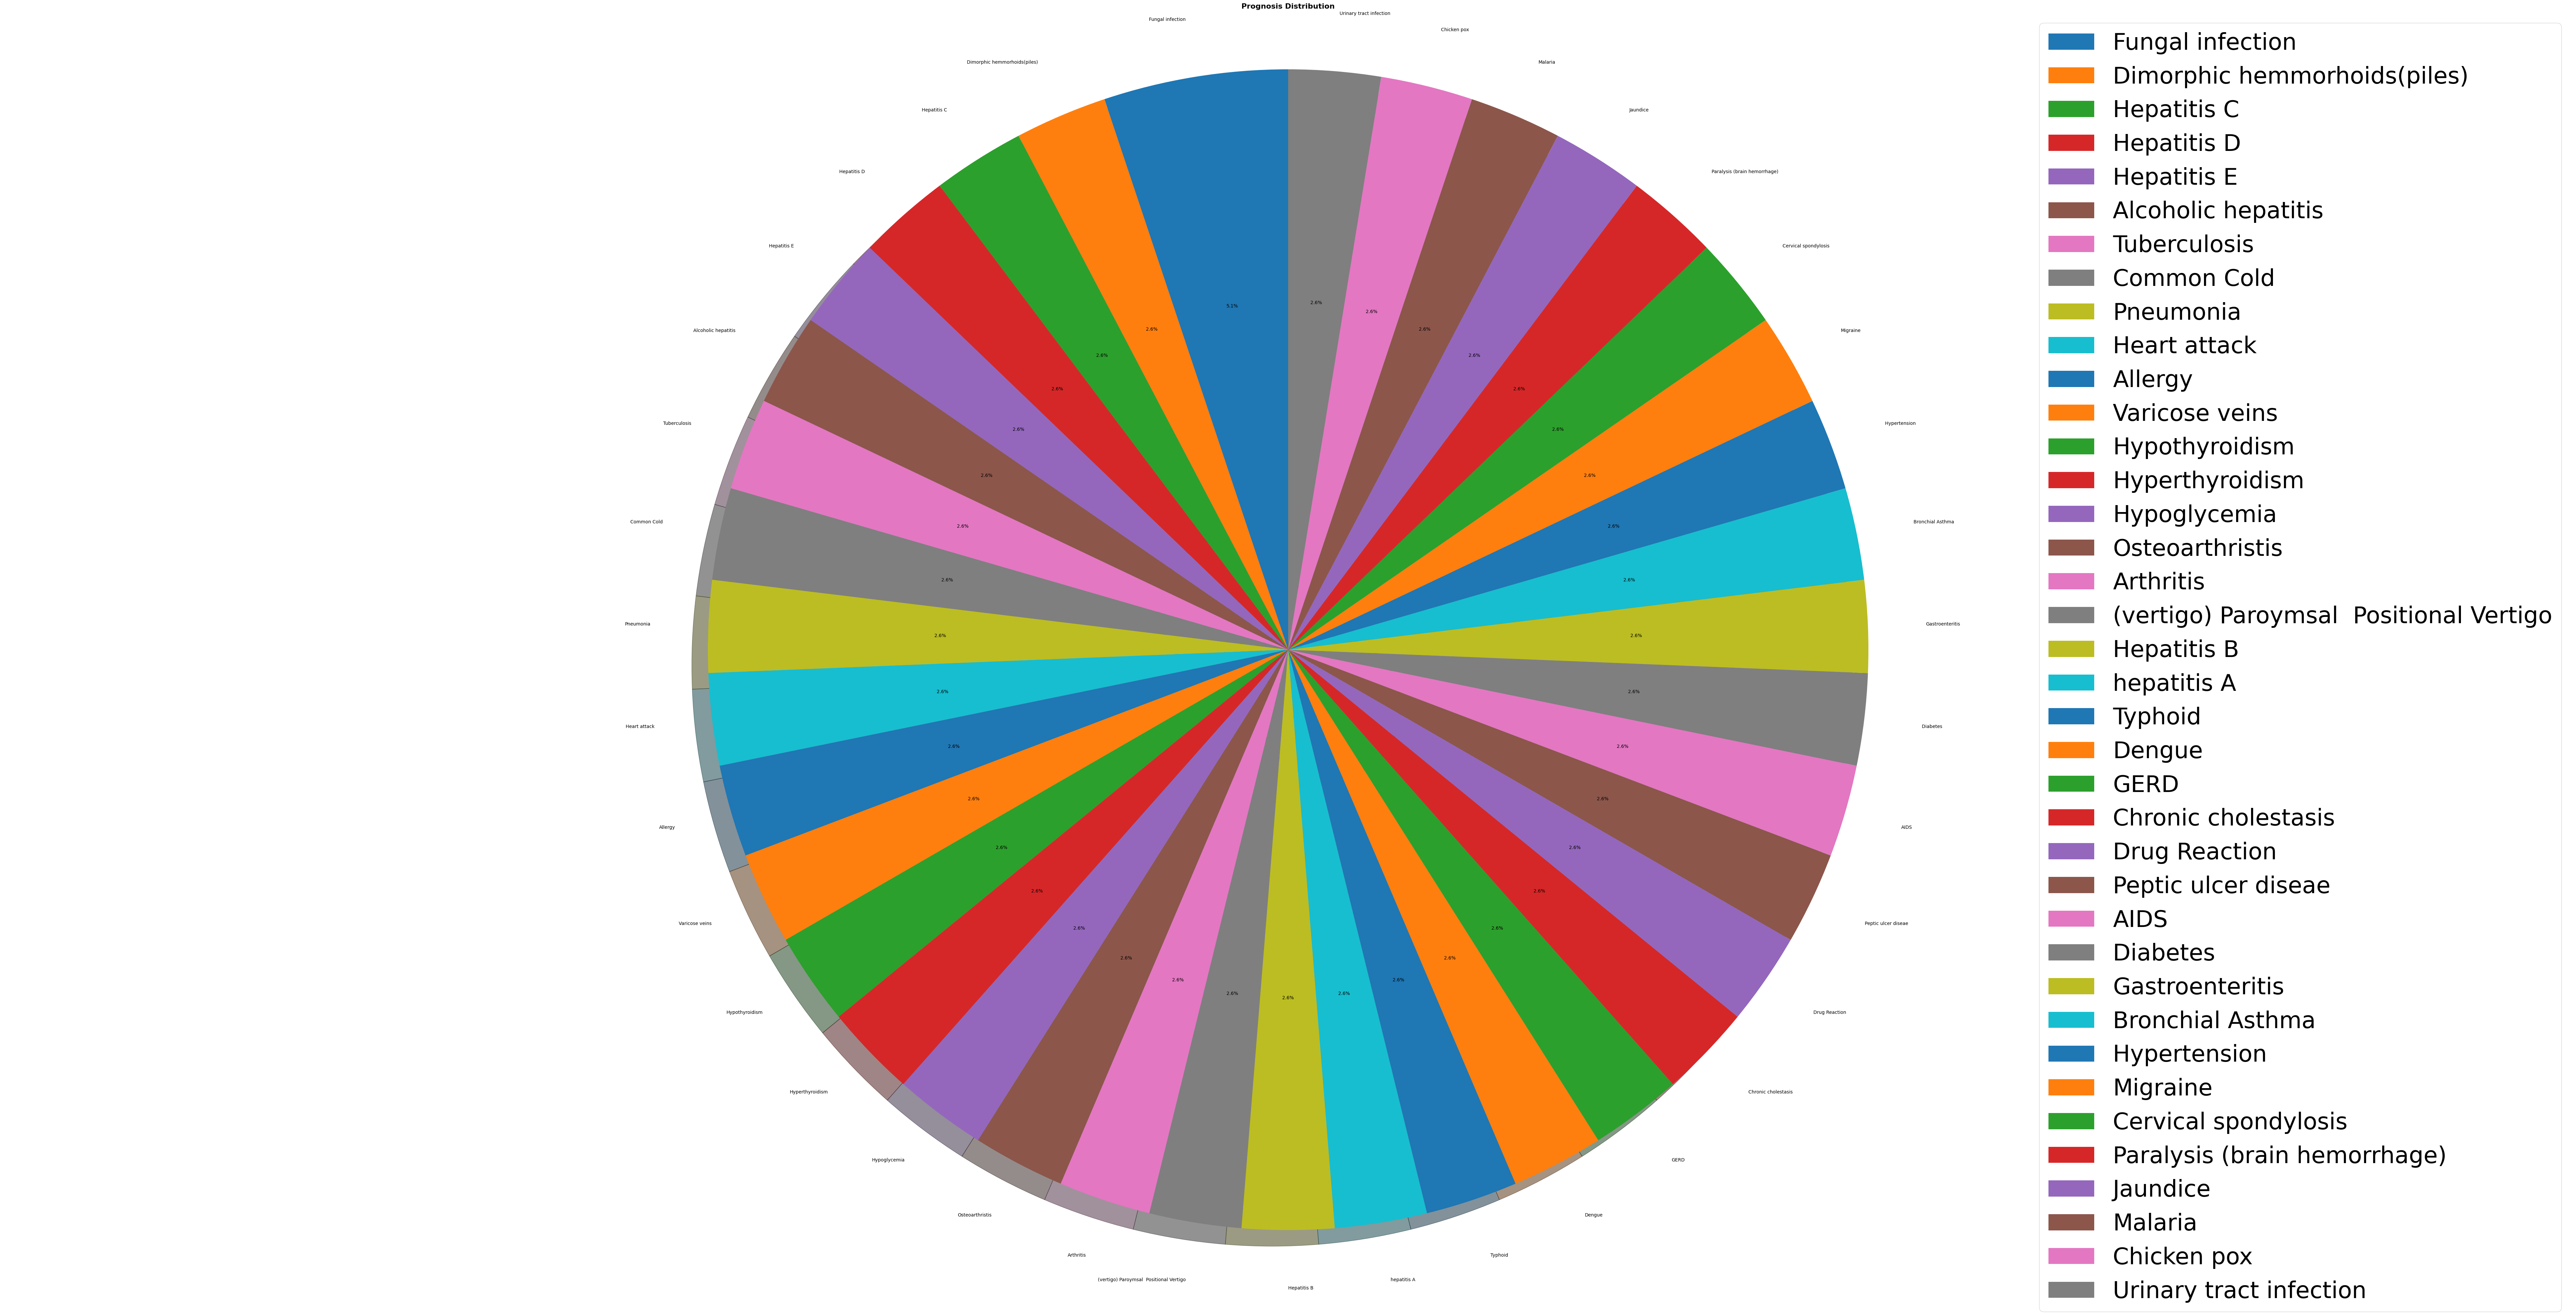

In [82]:
plt.figure(figsize=(100, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

IndexError: index 105 is out of bounds for axis 0 with size 105

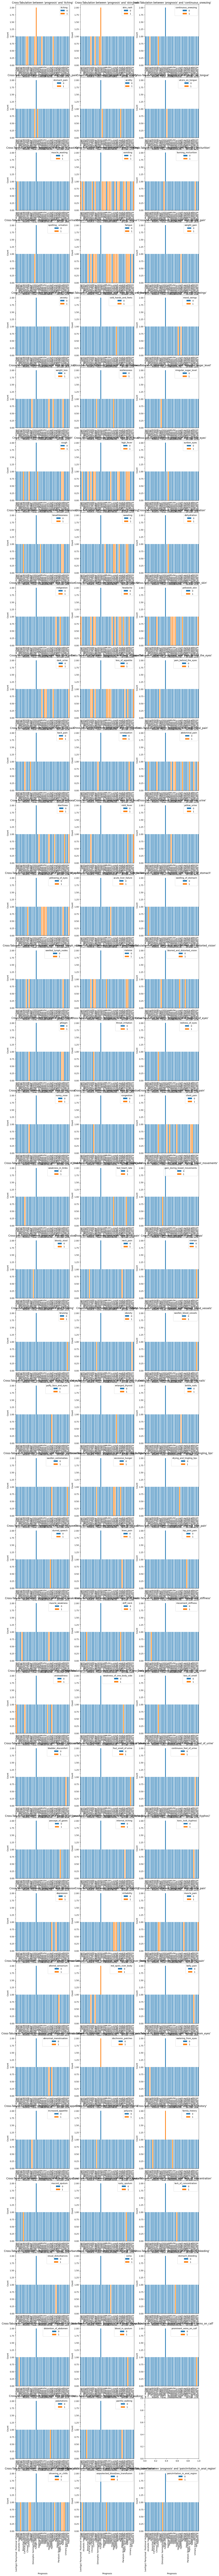

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame named 'df'

# Get the number of columns (excluding 'prognosis')
num_columns = len(df.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int(np.ceil(num_columns / 3))  # Adjust the number of rows as needed
num_cols = min(3, num_columns)  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * (num_rows+2)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(df.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(df['prognosis'], df[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()


In [84]:
num = ['itching','skin_rash','continuous_sneezing','joint_pain','stomach_pain','acidity','ulcers_on_tongue','burning_micturition',
       'spotting_ urination','weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','irregular_sugar_level','cough','high_fever',
       'sunken_eyes','breathlessness','sweating','dehydration','indigestion','headache','yellowish_skin','dark_urine','loss_of_appetite','pain_behind_the_eyes',
       'back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure',
       'swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','congestion',
       'chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','bloody_stool','neck_pain','dizziness','cramps','bruising','obesity',
       'swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties','excessive_hunger',
       'drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain','muscle_weakness',
       'stiff_neck','movement_stiffness','spinning_movements','weakness_of_one_body_side','loss_of_smell','bladder_discomfort',
       'foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)','depression','irritability',
       'muscle_pain','altered_sensorium',
       'red_spots_over_body','belly_pain','abnormal_menstruation','dischromic_patches','watering_from_eyes','increased_appetite',
       'polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','coma',
       'stomach_bleeding','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','shivering_or_chills',
       'unprotected_blood/sex_transfusion','pain/irritation_in_anal_region','swollen_painful_joints']

In [85]:
to_remove = ['joint_pain', 'spinning_movements', 'dizziness','swollen_legs']
num = [item for item in num if item not in to_remove]

In [86]:
#correlation
df[num].corr()

itching  skin_rash  continuous_sneezing  \
itching                            1.000000   0.620065            -0.108740   
skin_rash                          0.620065   1.000000            -0.089158   
continuous_sneezing               -0.108740  -0.089158             1.000000   
stomach_pain                       0.194178   0.258558            -0.054054   
acidity                           -0.108740  -0.089158            -0.054054   
ulcers_on_tongue                  -0.075872  -0.062209            -0.037716   
burning_micturition                0.194178   0.258558            -0.054054   
spotting_ urination                0.346844   0.423022            -0.037716   
weight_gain                       -0.075872  -0.062209            -0.037716   
anxiety                           -0.075872  -0.062209            -0.037716   
cold_hands_and_feets              -0.075872  -0.062209            -0.037716   
mood_swings                       -0.108740  -0.089158            -0.054054   
weight_loss                        0.062116  -0.129641            -0.078598   
restlessness                      -0.108740  -0.089158            -0.054054   
irregular_sugar_level             -0.075872  -0.062209            -0.037716   
cough                             -0.179358  -0.147059             0.258558   
high_fever                         0.003807   0.100514             0.112605   
sunken_eyes                       -0.075872  -0.062209            -0.037716   
breathlessness                    -0.158114  -0.129641            -0.078598   
sweating                          -0.199431  -0.163517            -0.099136   
dehydration                       -0.075872  -0.062209            -0.037716   
indigestion                       -0.108740  -0.089158            -0.054054   
headache                          -0.121629   0.126106             0.129700   
yellowish_skin                     0.258809  -0.194809            -0.118108   
dark_urine                         0.220354  -0.147059            -0.089158   
loss_of_appetite                   0.184406   0.126106            -0.136526   
pain_behind_the_eyes              -0.075872   0.423022            -0.037716   
back_pain                         -0.108740   0.258558            -0.054054   
constipation                      -0.108740  -0.089158            -0.054054   
abdominal_pain                     0.219578  -0.210042            -0.127343   
diarrhoea                         -0.179358  -0.147059            -0.089158   
mild_fever                         0.115728   0.177123            -0.067116   
yellow_urine                       0.346844  -0.062209            -0.037716   
yellowing_of_eyes                  0.129464  -0.179358            -0.108740   
acute_liver_failure               -0.075872  -0.062209            -0.037716   
swelling_of_stomach               -0.075872  -0.062209            -0.037716   
swelled_lymph_nodes                0.115728   0.177123             0.369136   
malaise                            0.170941   0.261628             0.223057   
blurred_and_distorted_vision      -0.135015  -0.110702            -0.067116   
phlegm                            -0.135015  -0.110702             0.369136   
throat_irritation                 -0.075872  -0.062209             0.697741   
redness_of_eyes                   -0.075872  -0.062209             0.697741   
congestion                        -0.075872  -0.062209             0.697741   
chest_pain                        -0.199431  -0.163517             0.223057   
weakness_in_limbs                 -0.075872  -0.062209            -0.037716   
fast_heart_rate                   -0.108740  -0.089158            -0.054054   
pain_during_bowel_movements       -0.075872  -0.062209            -0.037716   
bloody_stool                      -0.075872  -0.062209            -0.037716   
neck_pain                         -0.108740  -0.089158            -0.054054   
cramps                            -0.075872  -0.062209            -0.037716   
bruisin

<Axes: >

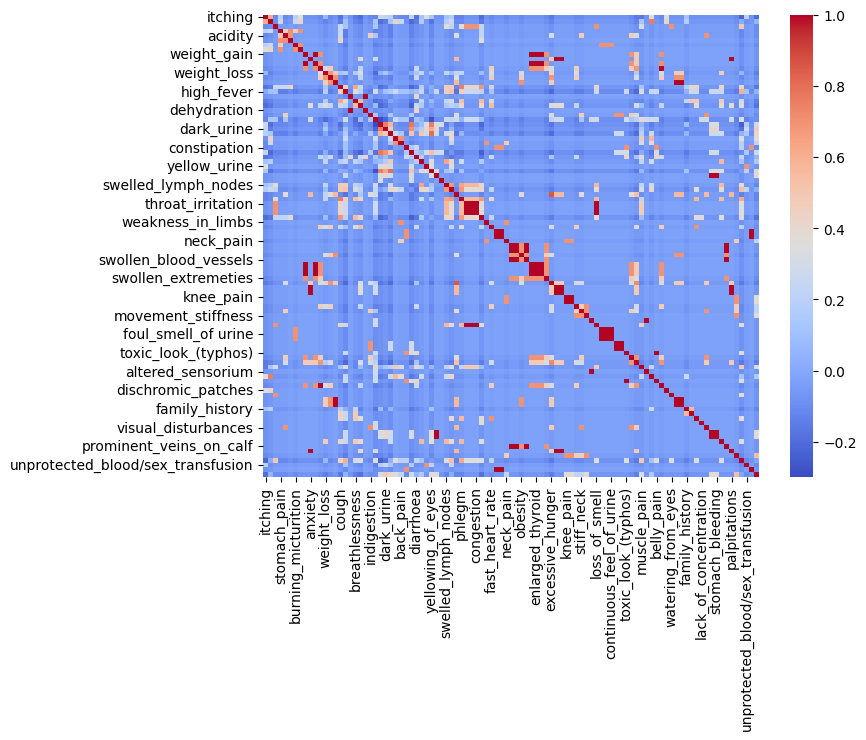

In [87]:
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=df[num].corr(),cmap='coolwarm')

## Modelling

### Feature Selection

In [88]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

In [89]:
X.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          0                    1             0        0   
2        0          0                    0             1        1   
3        1          0                    0             0        0   
4        1          1                    0             1        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 1               0         1                    0   
3                 0               0         1                    0   
4                 0               0         0                    1   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    1        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      1   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               1           0                 1   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               1          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  1                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

### Splitting of data into test and train

In [90]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.shape

(31, 105)

### Cross-Validation

In [92]:

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [RandomForestClassifier(n_estimators=100,max_features=85,random_state=42), GradientBoostingClassifier(n_estimators=250), DecisionTreeClassifier(random_state = 0), LogisticRegression()]

# The names of the models
algorithm_names = ["Random Forest Classifier", "Gradient Boosting Classifier", "Decision Tree Classifier", "Logistic Regression"]

In [93]:
def model_train_test(model,X_train,y_train,X_test,y_test):
    
    #model training
    model.fit(X_train,y_train)
    
    #predict
    pred = model.predict(X_test)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y_test,pred))
    
    #classification report
    print("\n Classification report")
    print(classification_report(y_test,pred))

In [94]:
from sklearn.model_selection import KFold, cross_val_score


#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    print(algorithm_names[i])
    model_train_test(model,X_train, y_train, X_test, y_test)

Random Forest Classifier
accuracy score =  0.0

 Classification report


c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00       1.0
                                   AIDS       0.00      0.00      0.00       1.0
                            Common Cold       0.00      0.00      0.00       1.0
                              Diabetes        0.00      0.00      0.00       0.0
                          Drug Reaction       0.00      0.00      0.00       1.0
                       Fungal infection       0.00      0.00      0.00       0.0
                           Heart attack       0.00      0.00      0.00       0.0
                            Hepatitis B       0.00      0.00      0.00       0.0
                          Hypertension        0.00      0.00      0.00       0.0
                           Hypoglycemia       0.00      0.00      0.00       1.0
           Paralysis (brain hemorrhage)       0.00      0.00      0.00       1.0
                           

c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

## Testing

### Working with test-data

In [95]:
df_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [96]:
df_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [97]:
#testing dataset percentage 
print("Testing Dataset percentage = ",100 * len(df_test)/(len(df)+len(df_test)))

Testing Dataset percentage =  51.851851851851855


In [98]:
df_test.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  muscle_wasting   vomiting  burning_micturition  \
count         42.000000       42.000000  42.000000            42.000000   
mean           0.023810        0.023810   0.404762             0.047619   
std            0.154303        0.154303   0.496796             0.215540   
min            0.000000        0.000000   0.000000             0.000000   
25%            0.000000        0.000000   0.000000             0.000000   
50%            0.000000        0.000000   0.000000             0.000000   
75%            0.000000        0.000000   1.000000             0.000000   
max            1.000000        1.000000   1.000000             1.000000   

       spotting_ urination    fatigue  weight_gain    anxiety  \
count            42.000000  42.000000    42.000000  42.000000   
mean              0.023810   0.404762     0.023810   0.023810   
std               0.154303   0.496796     0.154303   0.154303   
min               0.000000   0.000000     0.000000   0.000000   
25%               0.000000   0.000000     0.000000   0.000000   
50%               0.000000   0.000000     0.000000   0.000000   
75%               0.000000   1.000000     0.000000   0.000000   
max               1.000000   1.000000     1.000000   1.000000   

       cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
count             42.000000    42.000000    42.000000     42.000000   
mean               0.023810     0.047619     0.095238      0.047619   
std                0.154303     0.215540     0.297102      0.215540   
min                0.000000     0.000000     0.000000      0.000000   
25%                0.000000     0.000000     0.000000      0.000000   
50%                0.000000     0.000000     0.000000      0.000000   
75%                0.000000     0.000000     0.000000      0.000000   
max                1.000000     1.000000     1.000000      1.000000   

        lethargy  patches_in_throat  irregular_sugar_level      cough  \
count  42.000000          42.000000              42.000000  42.000000   
mean    0.095238           0.023810               0.023810   0.119048   
std     0.297102           0.154303               0.154303   0.327770   
min     0.000000           0.000000               0.000000   0.000000   
25%     0.000000           0.000000               0.000000   0.000000   
50%     0.000000           0.000000               0.000000   0.000000   
75%     0.000000           0.000000               0.000000   0.000000   
max     1.000000           1.000000               1.000000   1.000000   

       high_fever  sunken_eyes  breathlessness   sweating  dehydration  \
count   42.000000    42.000000       42.000000  42.000000    42.000000   
mean     0.285714    

### Preprocessing of test

In [99]:
df_test['shivering_or_chills'] = df_test['shivering'] | df_test['chills']
df_test.drop(columns=['shivering','chills'], inplace=True)

In [100]:
df_test['skin_rash'] = df_test['nodal_skin_eruptions'] | df_test['skin_rash']
df_test.drop(columns=['nodal_skin_eruptions'], inplace=True)

In [101]:
df_test['unprotected_blood_transfusion'] = df_test['receiving_blood_transfusion'] | df_test['receiving_unsterile_injections']
df_test.drop(columns=['receiving_blood_transfusion','receiving_unsterile_injections'], inplace=True)

In [102]:
df_test['patches_in_throat'] = df_test['patches_in_throat'] | df_test['muscle_wasting']
df_test.drop(columns=['patches_in_throat'], inplace=True)

In [103]:
df_test['vomiting'] = df_test['vomiting'] | df_test['nausea']
df_test.drop(columns=['nausea'], inplace=True)

In [104]:
df_test['runny_nose'] = df_test['runny_nose'] | df_test['sinus_pressure']
df_test.drop(columns=['sinus_pressure'], inplace=True)

In [105]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['loss_of_balance']
df_test.drop(columns=['loss_of_balance'], inplace=True)

In [106]:
df_test['distention_of_abdomen'] = df_test['distention_of_abdomen'] | df_test['history_of_alcohol_consumption']
df_test.drop(columns=['history_of_alcohol_consumption',], inplace=True)

In [107]:
df_test['unprotected_blood/sex_transfusion'] = df_test['unprotected_blood_transfusion'] | df_test['extra_marital_contacts']
df_test.drop(columns=['extra_marital_contacts','unprotected_blood_transfusion'], inplace=True)

In [108]:
df_test['pain/irritation_in_anal_region'] = df_test['pain_in_anal_region'] | df_test['irritation_in_anus']
df_test.drop(columns=['irritation_in_anus','pain_in_anal_region'], inplace=True)

In [109]:
df_test['fatigue'] = df_test['fatigue'] | df_test['lethargy']
df_test.drop(columns=['lethargy'], inplace=True)

In [110]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['spinning_movements']
df_test.drop(columns=['spinning_movements'], inplace=True)

In [111]:
df_test.rename(columns={'dischromic _patches': 'dischromic_patches'}, inplace=True)

In [112]:
df_test.drop(columns=['fluid_overload','fluid_overload.1'],inplace=True)

In [113]:
label_mapping = {
    'Acne': 'Skin Disorders',
    'Psoriasis': 'Skin Disorders',
    'Impetigo': 'Skin Disorders'
}

df_test['prognosis'] = df_test['prognosis'].replace(label_mapping)

In [114]:
columns_to_drop = ['pus_filled_pimples', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'skin_peeling','yellow_crust_ooze']
df_test.drop(columns=columns_to_drop, inplace=True)

In [115]:
df_test = df_test[df_test['prognosis'] != 'Skin Disorders']

In [116]:
df_test['swollen_painful_joints'] = df_test['swelling_joints'] | df_test['joint_pain']
df_test.drop(columns=['joint_pain','swelling_joints'], inplace=True)

In [117]:
df_test['unsteadiness'] = df_test['unsteadiness'] | df_test['dizziness']
df_test.drop(columns=['dizziness'], inplace=True)

In [118]:
df_test['swollen_extremeties'] = df_test['swollen_extremeties'] | df_test['swollen_legs']
df_test.drop(columns=['swollen_legs'], inplace=True)

In [119]:
df.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          0                    1             0        0   
2        0          0                    0             1        1   
3        1          0                    0             0        0   
4        1          1                    0             1        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 1               0         1                    0   
3                 0               0         1                    0   
4                 0               0         0                    1   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    1        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      1   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               1           0                 1   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               1          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  1                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

In [120]:
df_test.head()

itching  skin_rash  continuous_sneezing  stomach_pain  acidity  \
0        1          1                    0             0        0   
1        0          0                    1             0        0   
2        0          0                    0             1        1   
3        1          0                    0             0        0   
4        1          1                    0             1        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 1               0         1                    0   
3                 0               0         1                    0   
4                 0               0         0                    1   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    1        0            0        0                     0   

   mood_swings  weight_loss  restlessness  irregular_sugar_level  cough  \
0            0            0             0                      0      0   
1            0            0             0                      0      0   
2            0            0             0                      0      1   
3            0            0             0                      0      0   
4            0            0             0                      0      0   

   high_fever  sunken_eyes  breathlessness  sweating  dehydration  \
0           0            0               0         0            0   
1           0            0               0         0            0   
2           0            0               0         0            0   
3           0            0               0         0            0   
4           0            0               0         0            0   

   indigestion  headache  yellowish_skin  dark_urine  loss_of_appetite  \
0            0         0               0           0                 0   
1            0         0               0           0                 0   
2            0         0               0           0                 0   
3            0         0               1           0                 1   
4            0         0               0           0                 0   

   pain_behind_the_eyes  back_pain  constipation  abdominal_pain  diarrhoea  \
0                     0          0             0               0          0   
1                     0          0             0               0          0   
2                     0          0             0               0          0   
3                     0          0             0               1          0   
4                     0          0             0               0          0   

   mild_fever  yellow_urine  yellowing_of_eyes  acute_liver_failure  \
0           0             0                  0                    0   
1           0             0                  0                    0   
2           0             0                  0                    0   
3           0             0                  1                    0   
4           0             0                  0                    0   

   swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0        0   
1                    0                    0        0   
2                    0                    0        0   
3                    0                    0        0   
4                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0     

In [121]:
df_test.columns[df.isnull().any()]

Index([], dtype='object')

In [122]:
df_test.columns

Index(['itching', 'skin_rash', 'continuous_sneezing', 'stomach_pain',
       'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting',
       'burning_micturition', 'spotting_ urination',
       ...
       'distention_of_abdomen', 'blood_in_sputum', 'prominent_veins_on_calf',
       'palpitations', 'painful_walking', 'prognosis', 'shivering_or_chills',
       'unprotected_blood/sex_transfusion', 'pain/irritation_in_anal_region',
       'swollen_painful_joints'],
      dtype='object', length=106)

### Feature Selection

In [123]:
X = df_test.drop('prognosis',axis=1)
y = df_test['prognosis']

### Cross-validation

In [124]:
def test_accuracy(model,X):
    
    #predict
    pred = model.predict(X)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y,pred))
    
    #classification report
    print("\n",classification_report(y,pred))

In [125]:
from sklearn.model_selection import KFold, cross_val_score


#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    print(algorithm_names[i])
    test_accuracy(model,X)

Random Forest Classifier
accuracy score =  0.7948717948717948

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00         1
                                   AIDS       0.00      0.00      0.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       0.00      0.00      0.00         1
                                 Dengue     

c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

### Grid Search

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}  # l1 lasso l2 ridge
logreg = LogisticRegression(solver='liblinear')  # Specify the solver here
logreg_cv = GridSearchCV(logreg, grid, cv=2)
logreg_cv.fit(X_train, y_train)

print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)


tuned hyperparameters (best parameters): {'C': 1.0, 'penalty': 'l2'}
accuracy: 0.06458333333333333


c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [131]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
logreg_pred = logreg_cv.predict(X_test)

# Compute accuracy
logreg_acc = accuracy_score(y_test, logreg_pred)

# Get confidence scores (probability estimates) for each class
logreg_confidence = logreg_cv.predict_proba(X_test)

print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))


Accuracy on test set: 0.00%


### Model Selection

In [132]:
best_logreg = logreg_cv.best_estimator_
best_logreg

LogisticRegression(solver='liblinear')

### Feature Importance

In [133]:
feature_importances = best_logreg.coef_[0]


In [134]:
feature_importances

array([-0.38228558, -0.22000058, -0.12456387, -0.08197281, -0.14136652,
       -0.08197281,  0.        , -0.21889861, -0.123118  ,  0.        ,
       -0.50350045, -0.05005418,  0.        , -0.05005418, -0.08530045,
       -0.15962038, -0.09558649, -0.06034022, -0.14961664, -0.26782645,
       -0.10318683, -0.15851491, -0.18363757, -0.10318683, -0.14972522,
       -0.26346537,  0.21078493, -0.21492421, -0.42667644, -0.01271854,
       -0.11858465, -0.15571422,  0.13711289, -0.26628286, -0.07674666,
       -0.0421529 , -0.30271755, -0.03050943,  0.55679266, -0.0312807 ,
       -0.08615213, -0.11973392, -0.01037186,  0.        ,  0.        ,
        0.        ,  0.        , -0.27127627, -0.10586611, -0.03524627,
       -0.12047879, -0.12047879, -0.19450477,  0.        ,  0.        ,
       -0.06034022,  0.        , -0.05005418, -0.05005418, -0.05005418,
       -0.05005418, -0.15498019,  0.        ,  0.        , -0.08863866,
       -0.08863866, -0.12461785, -0.14876528, -0.08937158, -0.24

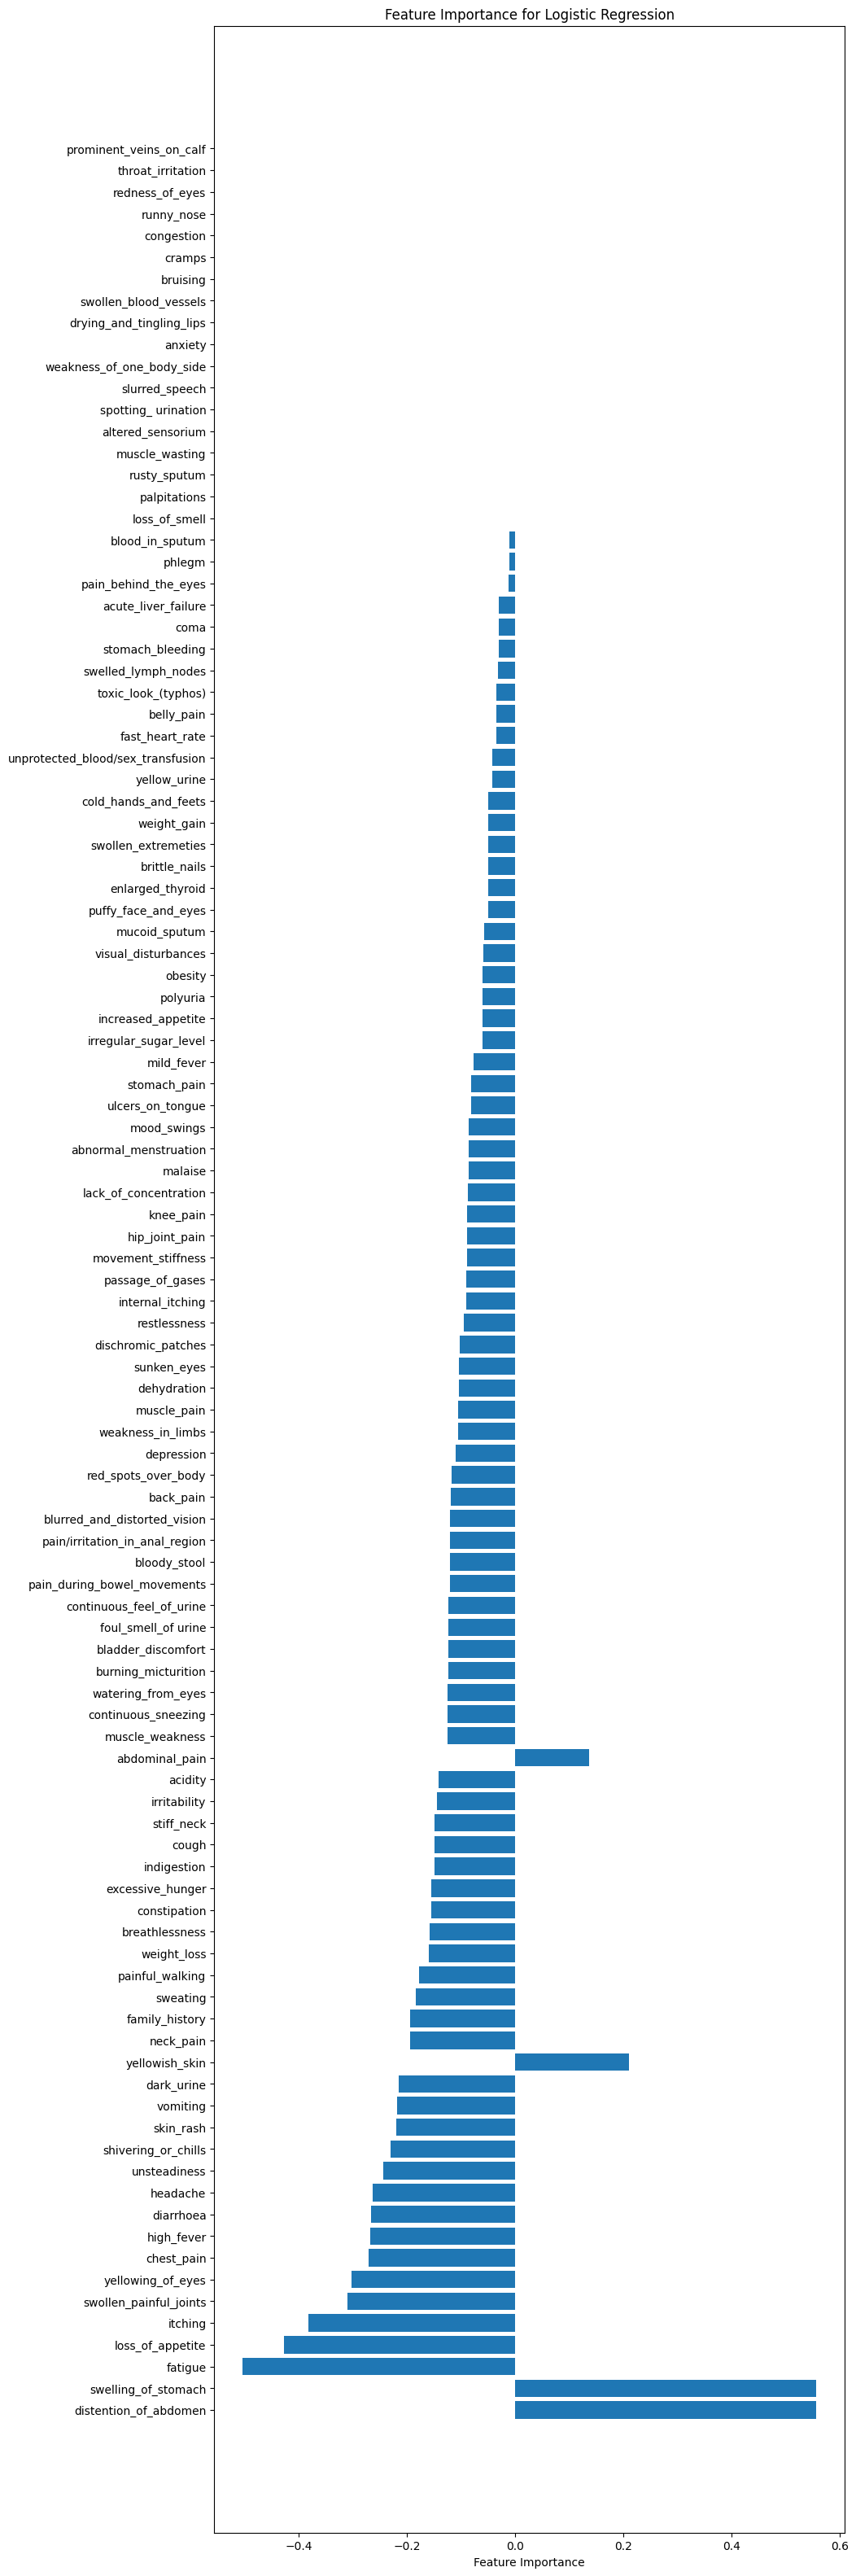

In [135]:
import numpy as np

# Calculate the absolute values of the feature coefficients
abs_coef = np.abs(best_logreg.coef_[0])

# Get the indices that would sort the coefficients in descending order
sorted_idx = np.argsort(abs_coef)[::-1]

# Sort the feature names and coefficients based on the sorted indices
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_coefs = best_logreg.coef_[0][sorted_idx]

# Set the figure size
plt.figure(figsize=(10, 40))  # Adjust the values (width, height) as needed

# Create a horizontal bar plot for the top features
plt.barh(sorted_features, sorted_coefs)

# Add labels, titles, etc. as needed
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Logistic Regression")

# Show the plot
plt.show()


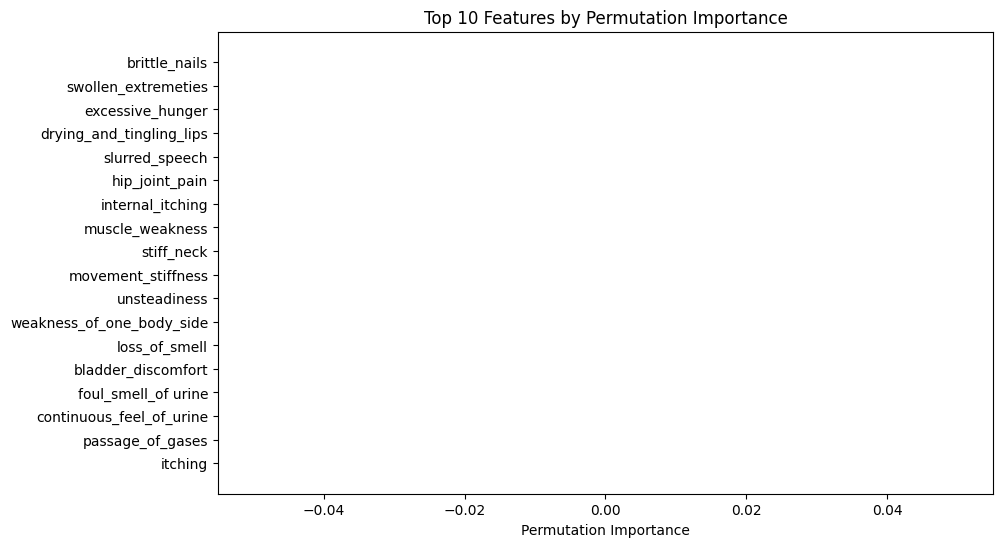

In [136]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_logreg, X_test, y_test)

# Get the indices of the top 10 features with the highest permutation importance
top_10_indices = (-perm_importance.importances_mean).argsort()[:18]

# Sort the importances and feature names based on the top 10 indices
sorted_importances = perm_importance.importances_mean[top_10_indices]
sorted_feature_names = X.columns[top_10_indices]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Permutation Importance")
plt.title("Top 10 Features by Permutation Importance")
plt.show()


## Inference

In [137]:
faker_data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0]
# Reshape the input data to match the number of features
faker_data_reshaped = np.array(faker_data).reshape(1, -1)  # Reshape z to have the same number of features as the training data

logreg_confidence = logreg_cv.best_estimator_.predict_proba(faker_data_reshaped)
print(logreg_confidence)
logreg_pred = logreg_cv.best_estimator_.predict(faker_data_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

[[0.03296979 0.03595804 0.05145695 0.04852381 0.03459774 0.02843729
  0.03096909 0.02586269 0.03014795 0.03513429 0.03965832 0.04835051
  0.03313723 0.02972713 0.03025762 0.02877556 0.02784733 0.02700782
  0.03342343 0.04132427 0.02950373 0.02727711 0.02948642 0.02996364
  0.03138758 0.03222851 0.03552806 0.02727392 0.03509258 0.02869158]]
['Arthritis']
Maximum confidence: 0.05145695056686763


c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [138]:
logreg_cv.best_estimator_.predict(X_test)

array(['Migraine', 'Hypertension ', 'Fungal infection', 'Malaria',
       'Diabetes ', 'Tuberculosis', 'Bronchial Asthma', 'Tuberculosis'],
      dtype=object)

In [141]:
X_test.columns.tolist()

['itching',
 'skin_rash',
 'continuous_sneezing',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'bloody_stool',
 'neck_pain',
 'cramps',
 'bruising',
 'obesity',
 'swolle